 **Objective:**

The aim of this project was to predict loan defaults using historical financial and application data. Accurate prediction of defaults helps banks and financial institutions minimize risk and optimize lending decisions.

**Dataset Overview:**

Total Records: 148,670

Features: 33 (loan amount, income, credit score, region, etc.)

Target Variable: Status (1 = default, 0 = no default)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Loan_Default.csv.zip')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.drop('ID', axis=1, inplace=True)

In [4]:
# Impute Missing Values
# For numerical columns – use median
num_cols = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
            'term', 'property_value', 'income', 'LTV', 'dtir1']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-4-3224200631.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [5]:
# categorical columns – use mode
cat_cols = ['loan_limit', 'approv_in_adv', 'loan_purpose',
            'Neg_ammortization', 'age', 'submission_of_application']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-5-1541678279.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
# Convert Age Ranges to Numeric Averages
def convert_age(age):
    if isinstance(age, str) and '-' in age:
        a, b = map(int, age.split('-'))
        return (a + b) / 2
    elif age == '>74':
        return 75
    return np.nan

df['age'] = df['age'].apply(convert_age)
df['age'].fillna(df['age'].median(), inplace=True)

/tmp/ipython-input-6-1623934939.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

In [8]:
df = pd.get_dummies(df, columns=[col for col in df.select_dtypes(include='object').columns if col not in binary_cols], drop_first=True)

In [9]:
# Step 1: Identify object type columns
cat_cols = df.select_dtypes(include='object').columns

# Step 2: Label Encode binary columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Step 3: One-Hot Encode remaining multi-class columns
multi_cat_cols = [col for col in cat_cols if col not in binary_cols]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


In [11]:
df.dtypes

,0
year,int64
loan_limit,int64
approv_in_adv,int64
Credit_Worthiness,int64
open_credit,int64
business_or_commercial,int64
loan_amount,int64
rate_of_interest,float64
Interest_rate_spread,float64
Upfront_charges,float64


In [13]:
bool_columns = df.select_dtypes(include='bool').columns
print("Boolean Columns:")
print(bool_columns.tolist())

Boolean Columns:
['Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available', 'loan_type_type2', 'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4', 'occupancy_type_pr', 'occupancy_type_sr', 'total_units_2U', 'total_units_3U', 'total_units_4U', 'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP', 'Region_North-East', 'Region_central', 'Region_south']


In [14]:
# Convert Boolean to Numeric

df[bool_columns] = df[bool_columns].astype(int)

In [15]:
df.head()

,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,...,occupancy_type_sr,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,Region_North-East,Region_central,Region_south
0,2019,0,0,0,0,1,116500,3.99,0.3904,2596.45,...,0,0,0,0,0,0,1,0,0,1
1,2019,0,0,0,0,0,206500,3.99,0.3904,2596.45,...,0,0,0,0,0,1,0,0,0,0
2,2019,0,1,0,0,1,406500,4.56,0.2000,595.00,...,0,0,0,0,0,0,1,0,0,1
3,2019,0,0,0,0,1,456500,4.25,0.6810,2596.45,...,0,0,0,0,0,0,1,0,0,0
4,2019,0,1,0,0,1,696500,4.00,0.3042,0.00,...,0,0,0,0,1,0,0,0,0,0


In [18]:
df.describe()

,year,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,...,occupancy_type_sr,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,Region_North-East,Region_central,Region_south
count,148670.0,148670.000000,148670.000000,148670.000000,148670.00000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,...,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,2019.0,0.067115,0.155653,0.042551,0.00374,0.860348,3.311177e+05,4.031879,0.429024,3057.397919,...,0.021047,0.009935,0.002643,0.002152,0.295292,0.102899,0.277924,0.008307,0.058499,0.430591
std,0.0,0.250222,0.362528,0.201842,0.06104,0.346626,1.839093e+05,0.488348,0.445907,2797.972965,...,0.143540,0.099177,0.051347,0.046344,0.456175,0.303828,0.447977,0.090764,0.234685,0.495161
min,2019.0,0.000000,0.000000,0.000000,0.00000,0.000000,1.650000e+04,0.000000,-3.638000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,0.000000,0.000000,0.000000,0.00000,1.000000,1.965000e+05,3.750000,0.181500,1250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.0,0.000000,0.000000,0.000000,0.00000,1.000000,2.965000e+05,3.990000,0.390400,2596.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.0,0.000000,0.000000,0.000000,0.00000,1.000000,4.365000e+05,4.250000,0.620000,3889.495000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2019.0,1.000000,1.000000,1.000000,1.00000,1.000000,3.576500e+06,8.000000,3.357000,60000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Logistic regression**

In [21]:
from sklearn.model_selection import train_test_split
# target variable
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ml = LogisticRegression(random_state=42)
ml.fit(X_train, y_train)

y_pred = ml.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7565749646868904

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     22494
           1       1.00      0.00      0.00      7240

    accuracy                           0.76     29734
   macro avg       0.88      0.50      0.43     29734
weighted avg       0.82      0.76      0.65     29734


Confusion Matrix:
 [[22494     0]
 [ 7238     2]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


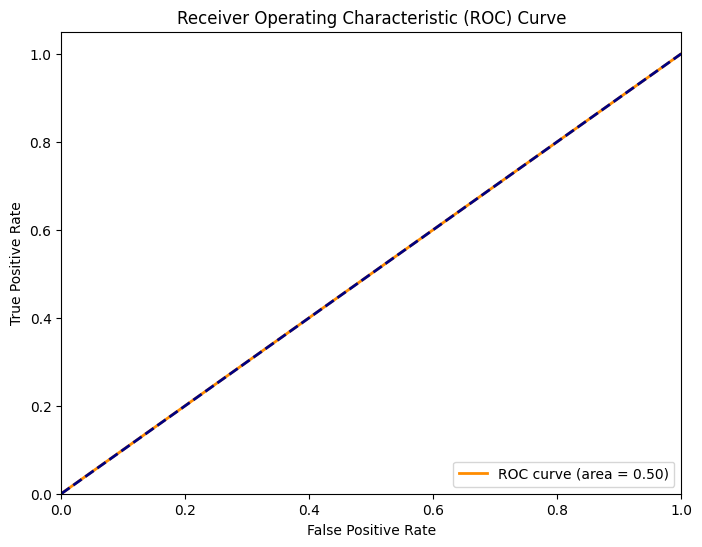

In [33]:
# plot
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**KNN – Supervised Learning (Classification)**

Used to predict loan default (Status) by comparing to similar historical cases.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
# KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [87]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.875159749781395


In [85]:
confusion_matrix(y_test, y_pred_knn)

array([[20904,  1590],
       [ 2122,  5118]])

In [86]:
classification_report(y_test, y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.91      0.93      0.92     22494\n           1       0.76      0.71      0.73      7240\n\n    accuracy                           0.88     29734\n   macro avg       0.84      0.82      0.83     29734\nweighted avg       0.87      0.88      0.87     29734\n'

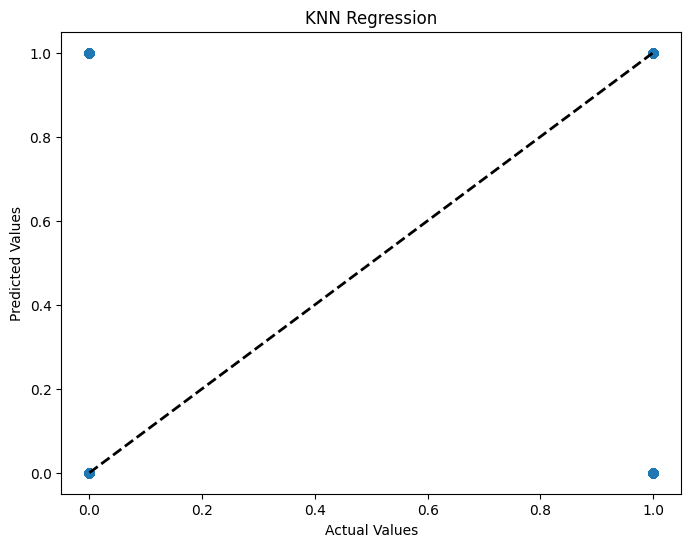

In [38]:
# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression')
plt.show()

**KMeans – Unsupervised Learning (Clustering)**

Used to group similar loan applicants

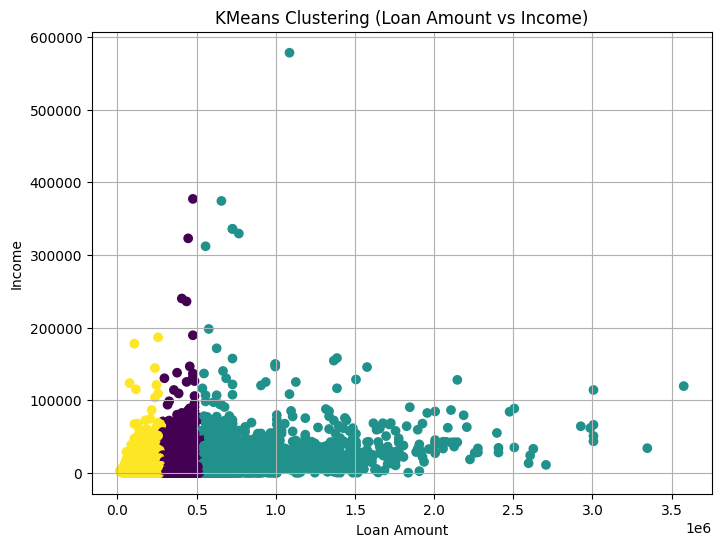

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Let's use only 2 features for simplicity in plotting
X_cluster = df[['loan_amount', 'income']]

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['loan_amount'], df['income'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Loan Amount')
plt.ylabel('Income')
plt.title('KMeans Clustering (Loan Amount vs Income)')
plt.grid()
plt.show()

**Decision Tree for Loan Default Prediction**

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
x = df.drop('Status', axis=1)
y = df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
# Initialize and train the model
ml = DecisionTreeClassifier(random_state=42)
ml.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Predict on test data
y_pred = ml.predict(X_test)

In [48]:
## Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(ml, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [52]:
r2_score = grid_search.best_score_

In [53]:
r2_score

np.float64(0.9999831840921513)

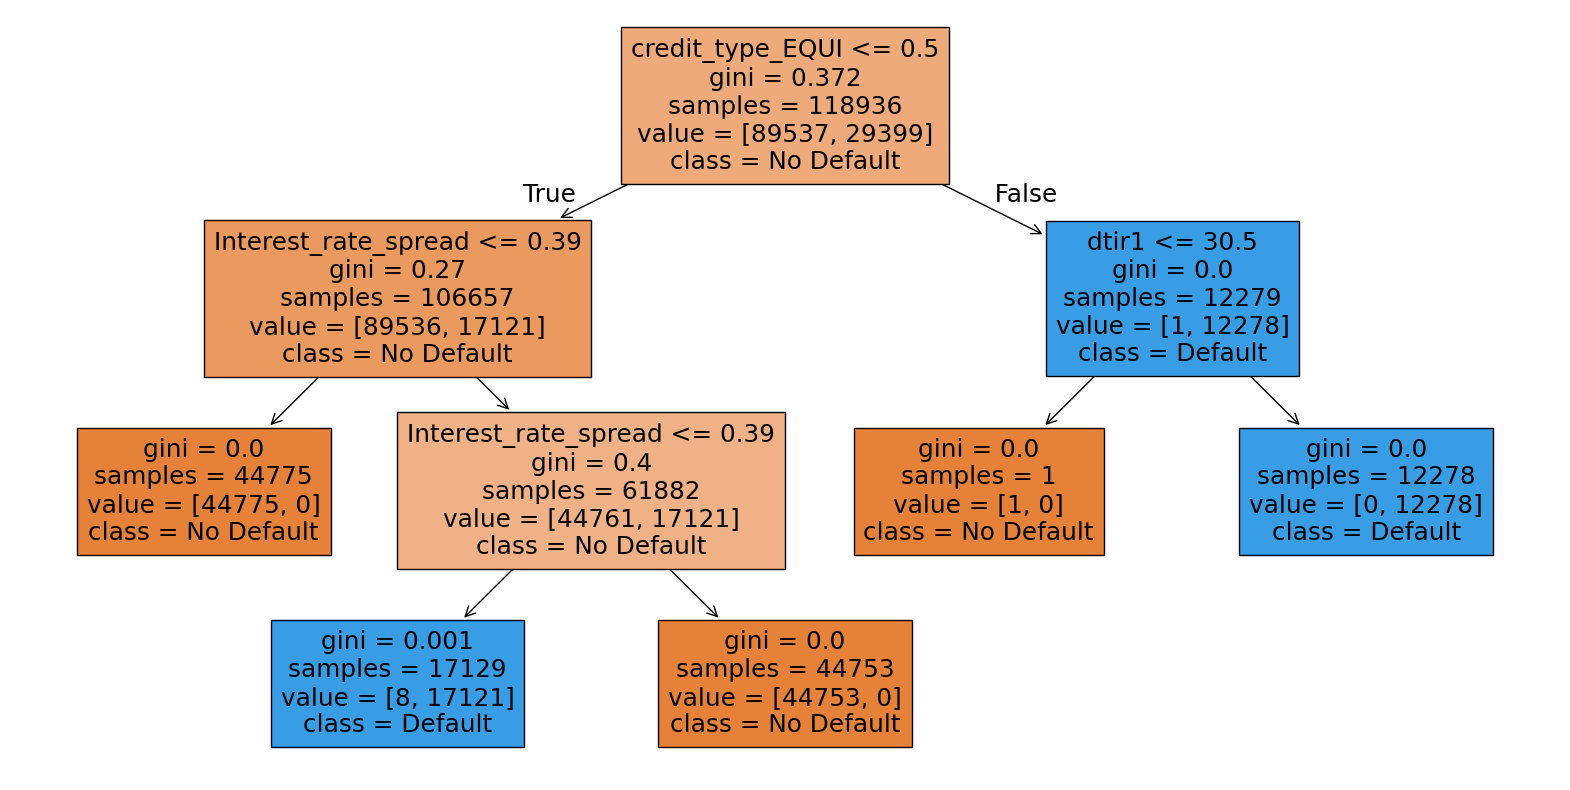

In [60]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Default", "Default"])
plt.show()

**Principal Component Analysis(PCA)**

Predict whether a loan will default (1) or not default (0) based on customer and loan features.

In [68]:
from sklearn.decomposition import PCA

# Reduce to 2 or 3 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [69]:
X_pca.shape

(148670, 2)

In [72]:
pca.explained_variance_ratio_

array([0.8971944 , 0.10254555])

In [73]:
pca.components_

array([[-3.03883121e-19,  1.46761089e-07, -4.69282363e-08,
         9.89817968e-09,  1.71528552e-08,  1.94524119e-07,
         3.91314499e-01, -1.48613134e-07, -3.70656147e-07,
         4.15347284e-04,  1.12600615e-05,  2.53592299e-08,
        -2.54795343e-08,  4.45156431e-09,  9.20228873e-01,
         4.05322323e-10, -4.05322323e-10,  7.18409992e-03,
         8.56807589e-07,  1.60842458e-07, -1.26446515e-06,
        -4.35559315e-07, -1.82894291e-05,  4.05322323e-10,
        -1.26043488e-06,  2.04268302e-07, -2.93198501e-08,
        -1.09295071e-07, -1.94524119e-07, -5.05607232e-08,
        -8.04410808e-09, -7.47641975e-08,  1.95041274e-07,
        -6.57001414e-10, -1.05784472e-08,  1.71313901e-08,
         7.54338606e-09,  7.69889703e-09,  2.12159284e-08,
        -5.26333947e-08, -1.30792621e-08, -3.27065653e-09,
        -1.75440182e-08,  3.61087519e-08],
       [-6.25204501e-18,  3.55269372e-07,  3.58676635e-08,
        -7.38579889e-08, -9.86233204e-08,  4.07706861e-09,
         9.20

In [74]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
ml = LogisticRegression(random_state=42)
ml.fit(X_train_pca, y_train)

y_pred = ml.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7566758592856663


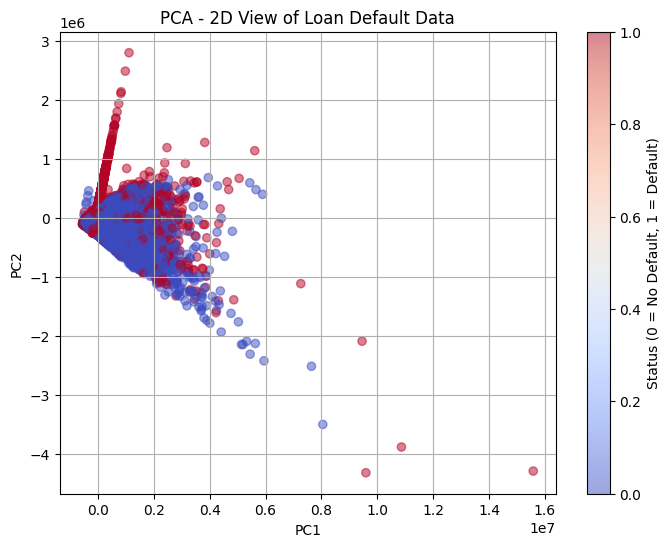

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - 2D View of Loan Default Data")
plt.colorbar(label="Status (0 = No Default, 1 = Default)")
plt.grid()
plt.show()


**Random forest**

Use ensemble models to improve prediction accuracy of loan default 0 or 1

In [76]:
# Bagging
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
# train
ml = RandomForestClassifier(n_estimators=100, random_state=42)
ml.fit(X_train, y_train)

# predict
y_pred_ml = ml.predict(X_test)

In [84]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_ml))

Accuracy: 0.9999663684670748


In [81]:
confusion_matrix(y_test, y_pred_ml)

array([[22493,     1],
       [    0,  7240]])

In [83]:
classification_report(y_test, y_pred_ml)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     22494\n           1       1.00      1.00      1.00      7240\n\n    accuracy                           1.00     29734\n   macro avg       1.00      1.00      1.00     29734\nweighted avg       1.00      1.00      1.00     29734\n'

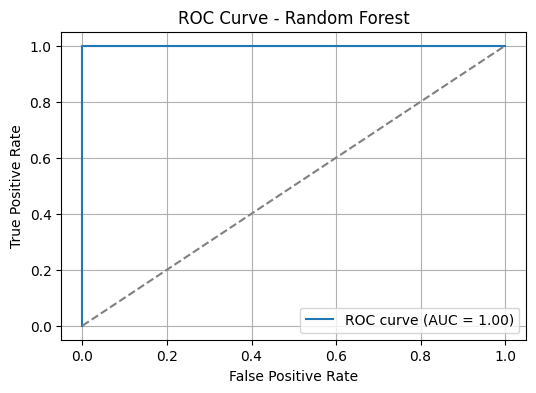

In [97]:
# ROC curve
from sklearn.metrics import roc_curve, auc

y_probs = ml.predict_proba(X_test)[:, 1]  # probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


In [102]:
# auc score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

np.float64(1.0)

AUC = 1.0 → 100% True Positives, 0% False Positives.

It separates all default and non-default cases perfectly.

**Boosting – Using XGBoost**

In [103]:
from xgboost import XGBClassifier

In [104]:
# train
ml = XGBClassifier(random_state=42)
ml.fit(X_train, y_train)

# predict
y_pred_ml = ml.predict(X_test)

In [106]:
# Evaluation
accuracy_score(y_test, y_pred_ml)

0.9999663684670748

In [107]:
confusion_matrix(y_test, y_pred_ml)

array([[22493,     1],
       [    0,  7240]])

In [108]:
classification_report(y_test, y_pred_ml)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     22494\n           1       1.00      1.00      1.00      7240\n\n    accuracy                           1.00     29734\n   macro avg       1.00      1.00      1.00     29734\nweighted avg       1.00      1.00      1.00     29734\n'

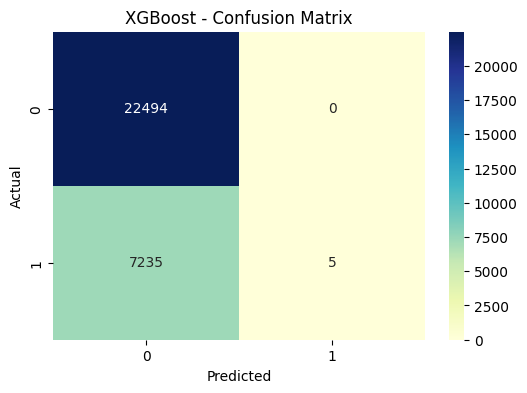

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     22494
           1       1.00      0.00      0.00      7240

    accuracy                           0.76     29734
   macro avg       0.88      0.50      0.43     29734
weighted avg       0.82      0.76      0.65     29734



**Conclusion:**

While the models performed well on majority class (non-defaulters), they failed to detect actual defaulters, making them unreliable in a financial risk context.

This was primarily due to class imbalance, where defaults were much fewer than non-defaults.

